In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [150]:
%matplotlib inline

In [151]:
from tensorflow.keras.datasets import mnist

In [152]:
 (x_train,y_train),(x_test,y_test)= mnist.load_data()

In [153]:
single_image = x_train[2]

In [154]:
 single_image.shape

(28, 28)

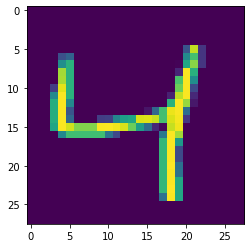

In [155]:
plt.imshow(single_image)

In [156]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [157]:
from tensorflow.keras.utils import to_categorical

In [158]:
y_train.shape

(60000,)

In [159]:
y_example = to_categorical(y_train)

In [160]:
y_example.shape

(60000, 10)

In [161]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [164]:
y_cat_test = to_categorical(y_test,num_classes = 10)

In [165]:
y_cat_train = to_categorical(y_train,10)

In [166]:
x_train = x_train/255
x_test = x_test/255

In [167]:
scald_image = x_train[1]

In [168]:
scald_image.max()

1.0

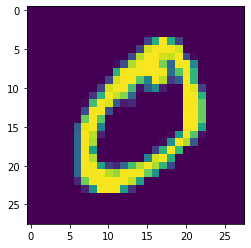

In [169]:
plt.imshow(scald_image)

In [170]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [171]:
from tensorflow.keras.models import Sequential

In [172]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [173]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [174]:
from tensorflow.keras.callbacks import EarlyStopping

In [175]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)



In [176]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2841 - accuracy: 0.9131 - val_loss: 0.0566 - val_accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0516 - val_accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0424 - val_accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0373 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0461 - val_accuracy: 0.9865


In [177]:
metrics  =pd.DataFrame(model.history.history)

In [178]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139522,0.957850,0.056641,0.9804
1,0.048124,0.985067,0.051628,0.9826
2,0.030348,0.990717,0.042443,0.9868
3,0.020832,0.993450,0.037270,0.9869
4,0.013674,0.995583,0.046126,0.9865


<AxesSubplot:>

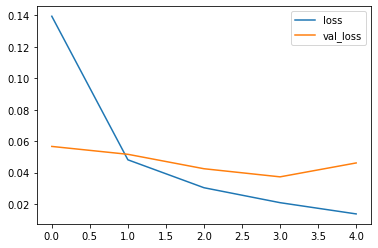

In [179]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

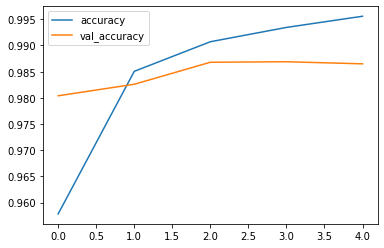

In [180]:
metrics[['accuracy','val_accuracy']].plot()

In [181]:
model.metrics_names

['loss', 'accuracy']

In [182]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04612600430846214, 0.9865000247955322]

In [183]:
from sklearn.metrics import  classification_report,confusion_matrix

In [184]:
predictions = model.predict_classes(x_test)

In [185]:
y_cat_test.shape

(10000, 10)

In [186]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [187]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [188]:
confusion_matrix(y_test,predictions)

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   1, 1128,    3,    1,    0,    0,    0,    1,    1,    0],
       [   4,    0, 1021,    0,    1,    0,    0,    6,    0,    0],
       [   0,    0,    3,  997,    0,    5,    0,    1,    3,    1],
       [   0,    0,    3,    0,  975,    0,    1,    0,    0,    3],
       [   3,    0,    0,    4,    0,  876,    2,    0,    4,    3],
       [  10,    3,    0,    0,    3,    1,  937,    0,    4,    0],
       [   0,    2,    7,    0,    0,    0,    0, 1015,    1,    3],
       [  10,    0,    5,    0,    1,    0,    0,    1,  953,    4],
       [   2,    1,    0,    2,    8,    1,    0,    8,    3,  984]],
      dtype=int64)

In [189]:
import seaborn as sns

<AxesSubplot:>

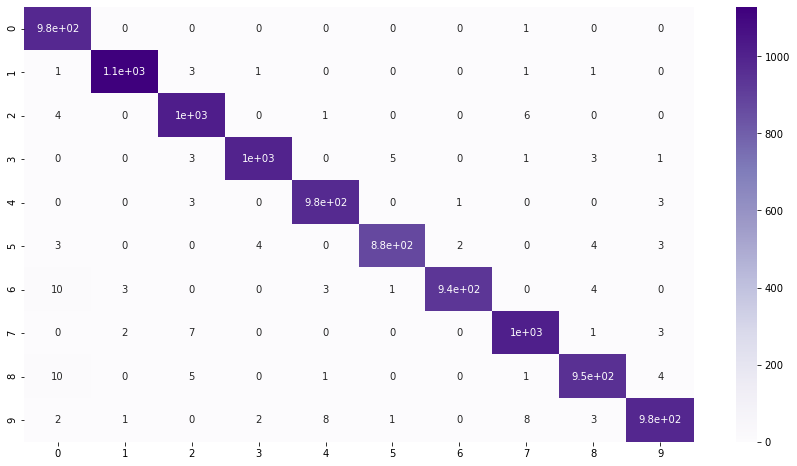

In [190]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,predictions),cmap='Purples',annot=True)

In [191]:
my_number = x_test[1]

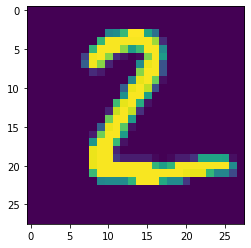

In [192]:
plt.imshow(my_number.reshape(28,28))

In [193]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([2], dtype=int64)